# Loading and fitting multiple diffraction patterns

If a number of diffraction patterns are collected over time they can be automatically fitted and the change in peaks over time measured. The change in the positions or heights of the peaks can then be correlated to material properties. 

In the example files folder there is a sequence of 10 diffraction patterns which we will use for demonstation.

The first thing to do is to load an `FittingExperiment` object - this contains some metadata about the expeiment and will hold one `FitSpectrum` for each diffraction pattern. The *first_cake_angle*, *cakes_to_fit*, *peak_params* and *merge_cakes* parameters are the same as before. The *frame_time* parameter sets the number of seconds between each frame in the sequence - thi svalue is used to approprately label the x-axis on plots. The *file_stub* parameter is used to locate the files. To use all of the frames in a folder that are sequentially numbered - provide the stub of the file name with a star (wildcard).

once the `FittingExperiment` object is loaded, the `run_analysis` method runs the fit over all of the specified files.

In [1]:
%matplotlib inline

import sys
sys.path.append('./..')

import spectrum_fitting
from spectrum_fitting import PeakParams, MaximumParams


first_cake_angle = 90
cakes_to_fit = [36, 1, 2]
peak_params = PeakParams('1', (2.8, 2.9))
merge_cakes = True

frame_time = 1
file_stub = "../example_data/adc_041_7Nb_NDload_700C_15mms_*"

experiment = spectrum_fitting.FittingExperiment(frame_time, file_stub, first_cake_angle, 
                                                cakes_to_fit, peak_params, merge_cakes)

experiment.run_analysis()

Processing 10 diffraction patterns.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.53it/s]


Analysis complete.


The results are hierarchically stored in the `FitExperiment` object however, if you only need to do basic analysis then it is sufficient to use the helper methods in `FitExperiment` to plot the results.

The `peak_names` method lists the names of the fitted peaks specified at the start of the analysis. The `fit_parameters` method gives a list of the names of the fit parameters for a particular peak.

In [2]:
print(experiment.peak_names())
print(experiment.fit_parameters('1'))

['1']
['peak_1_amplitude', 'peak_1_center', 'peak_1_sigma', 'peak_1_fraction', 'constant_background']


To plot a parameter for a fit over time use the `plot_fit_parameter` method. To plot all of the parameters for all of the peaks just use a loop:

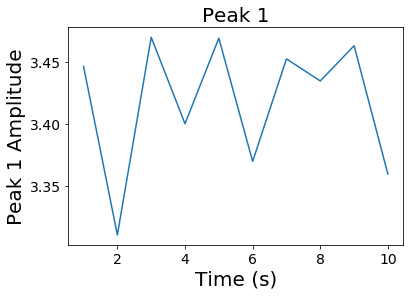

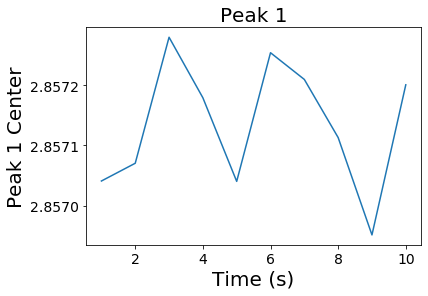

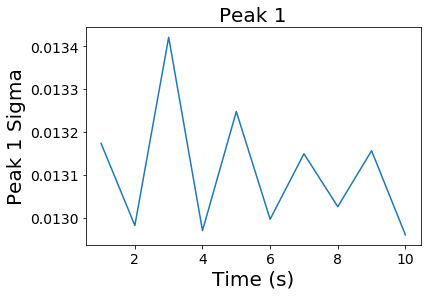

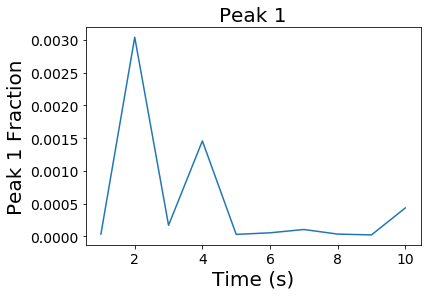

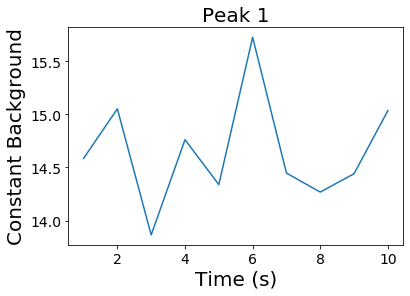

In [3]:
for peak_name in experiment.peak_names():
    for parameter in experiment.fit_parameters(peak_name):
        experiment.plot_fit_parameter(peak_name, parameter)

In this example the peaks do not do anything very interesting. This is because the 10 example files represent only a short time period where little was changing in the material.

## Fitting multiple peaks at multiple times
We can set up a larger analysis to fit multiple peaks over time. It is probably a good workflow to set all of the peak params on a single file first to check that the fits are good and then copy the peak params to run over multiple files. Here we take the peak params from the previous tutorial notebook

In [4]:
first_cake_angle = 90
cakes_to_fit = [36, 1, 2]
peak_params = [PeakParams('1', (2.8, 2.9)),
               PeakParams('2', (3.05, 3.15)),
               PeakParams('3',  (3.15, 3.30), [MaximumParams(3.18, 3.205, 3.225), MaximumParams(3.23, 3.25, 3.28)]),
               PeakParams('4', (4.10, 4.30))]
merge_cakes = True

frame_time = 1
file_stub = "../example_data/adc_041_7Nb_NDload_700C_15mms_*"

experiment = spectrum_fitting.FittingExperiment(frame_time, file_stub, first_cake_angle, 
                                                cakes_to_fit, peak_params, merge_cakes)

experiment.run_analysis()

Processing 10 diffraction patterns.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.94it/s]


Analysis complete.


In [5]:
print(experiment.peak_names())
for peak_name in experiment.peak_names():
    print(experiment.fit_parameters(peak_name))

['1', '2', '3', '4']
['peak_1_amplitude', 'peak_1_center', 'peak_1_sigma', 'peak_1_fraction', 'constant_background']
['peak_1_amplitude', 'peak_1_center', 'peak_1_sigma', 'peak_1_fraction', 'constant_background']
['peak_1_amplitude', 'peak_1_center', 'peak_1_sigma', 'peak_1_fraction', 'peak_2_amplitude', 'peak_2_center', 'peak_2_sigma', 'peak_2_fraction', 'constant_background']
['peak_1_amplitude', 'peak_1_center', 'peak_1_sigma', 'peak_1_fraction', 'constant_background']


Here we can see that we have the four peaks we have fitted. Notice that the third peak has two sets of fit parameters. Since the third peak it is fitted with a compund fit, the first fit corresponds to the first peak and the second the second peak.

As before we can loop over the names though this time we plot just the centre of the fit.

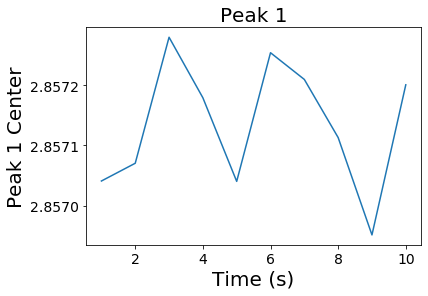

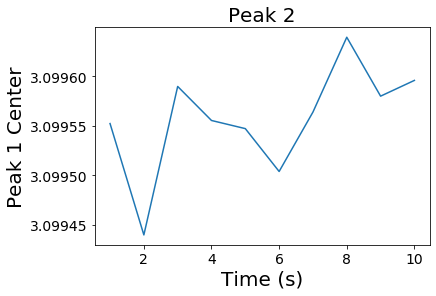

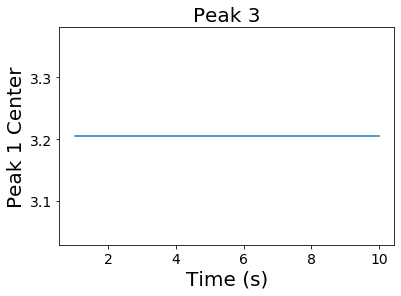

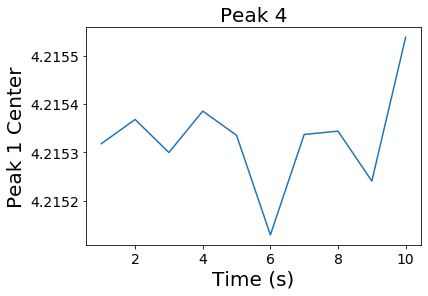

In [6]:
for peak_name in experiment.peak_names():
    experiment.plot_fit_parameter(peak_name, "peak_1_center")

If we wanted both peaks from the doublet this would be:

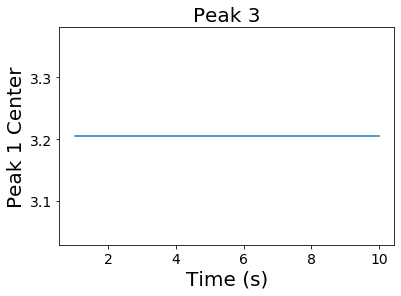

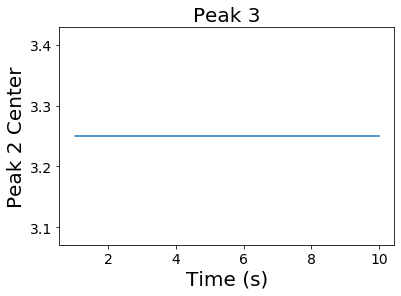

In [7]:
experiment.plot_fit_parameter("3", "peak_1_center")
experiment.plot_fit_parameter("3", "peak_2_center")

## Selecting a subset of timesteps

Sometimes it is the case that we do not want to process all timesteps in a series. Perhaps the sampling frequency is too high and we only want to fit every other frame or every 10th frame. Perhaps the interesting data is at the end so you want to skip the first 100 frames. This can be done by  supplying an extra parameter to the `FitExperiment` object.

The frames_to_load parameter is a list of integer values specifying which files to load. The file stub also has to be modified here - add a python format string where the numbers need to be substitued in the file name. In this example `:05d` corresponds to a 5 digit wide integer padded with zeros. This means 1 will become 00001, 10 will become 00010 etc. For more on python sting formatting see here: 

The below example will load just timesteps 1, 3 and 4 from the example folder. Notice how the x-axis on the plots scales correctly - leaving a gap at 2 seconds where there is no data.

Processing 3 diffraction patterns.


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.96it/s]


Analysis complete.


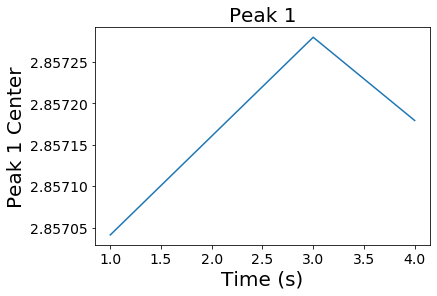

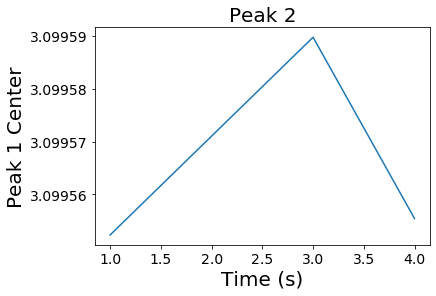

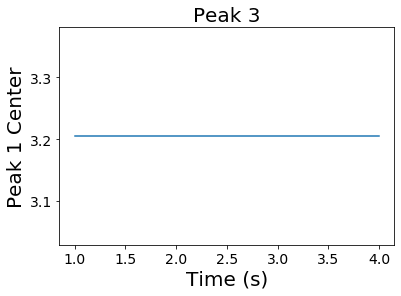

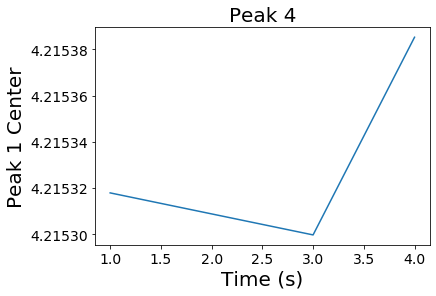

In [8]:
first_cake_angle = 90
cakes_to_fit = [36, 1, 2]
peak_params = [PeakParams('1', (2.8, 2.9)),
               PeakParams('2', (3.05, 3.15)),
               PeakParams('3',  (3.15, 3.30), [MaximumParams(3.18, 3.205, 3.225), MaximumParams(3.23, 3.25, 3.28)]),
               PeakParams('4', (4.10, 4.30))]
merge_cakes = True

frame_time = 1
file_stub = "../example_data/adc_041_7Nb_NDload_700C_15mms_{:05d}.dat"
frames_to_load = [1, 3, 4]

experiment = spectrum_fitting.FittingExperiment(frame_time, file_stub, first_cake_angle, 
                                                cakes_to_fit, peak_params, merge_cakes, frames_to_load)

experiment.run_analysis()
for peak_name in experiment.peak_names():
    experiment.plot_fit_parameter(peak_name, "peak_1_center")